   from  to
0     1   2
1     2   1
2     3   3
3     4   2
4     1   1
5     2   2
6     1   1
[(1, 2, 0), (1, 1, 0), (1, 1, 1), (2, 1, 0), (2, 2, 0), (3, 3, 0), (4, 2, 0)]


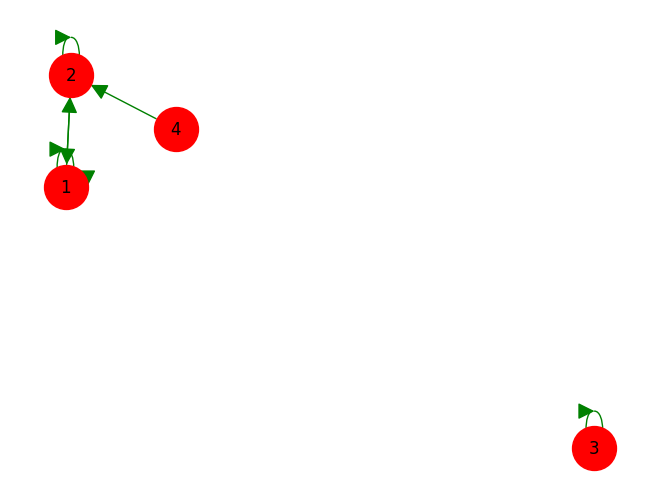

In [4]:
import dash
from dash import dcc, html, Input, Output
import networkx as nx
import plotly.graph_objects as go
import pandas as pd

from_nodes = [1,2,3,4,1,2,1]
to_nodes =  [2,1,3,2,1,2,1]
data = pd.DataFrame({'from':from_nodes, 'to':to_nodes})
print(data)

G = nx.MultiDiGraph()

G.nodes(set(from_nodes))
for x,y in zip(data['from'], data['to']):
    G.add_edge(x,y)

print(G.edges)

nx.draw(G, with_labels=True, node_size=1000, node_color='r', edge_color='g', arrowsize=25)

In [5]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_x = []
node_y = []
for node in G.nodes():
    x,y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)


node_trace = go.Scatter(
   x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2) 
)

KeyError: 'pos'